In [1]:
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
matplotlib.rcParams['font.size'] = 9
%matplotlib inline

In [66]:
def std_convoluted(image, N):
    im = np.array(image, dtype=float)
    im2 = im**2
    ones = np.ones(im.shape)

    kernel = np.ones((2*N+1, 2*N+1))
    s = scipy.signal.convolve2d(im, kernel, mode="same")
    s2 = scipy.signal.convolve2d(im2, kernel, mode="same")
    ns = scipy.signal.convolve2d(ones, kernel, mode="same")

    return np.sqrt((s2 - s**2 / ns) / ns)

In [67]:
def normalize(x):
    mean_ker = np.ones((5, 5)) / 25
    mean = signal.convolve2d(x, mean_ker, boundary='symm', mode='same')
    std = std_convoluted(x, 2)
    blurr_image = (x - mean) / std
    return blurr_image
    

In [68]:
def preprocess(x):
    img = x.astype(np.uint8)
    img = img_as_ubyte(img)

    threshold_global_otsu = threshold_otsu(img)
    global_otsu = img >= threshold_global_otsu
    mask = np.ones_like(img, dtype = np.bool_)
    rows, cols = img.shape
    for i in range(0, rows, 48):
        for j in range(0, cols, 48):
            patch = global_otsu[i:i+48, j:j+48]
            summ = np.sum(patch)
            if summ == 0 or summ == 48*48:
                mask [i:i+48, j:j+48] = 0
    return mask

In [69]:
# Extracting number of random 48 X 48 patches
def patches(mask):
    ir = range(170, 3050)
    ic = range(120, 1650)
    selected_indices = []
    count = 0
    rand_ir = np.random.choice(ir, (100), replace=False)
    rand_ic = np.random.choice(ic, (100), replace=False)
    for r in rand_ir:
        for c in rand_ic:
            summ = np.sum(mask[r:r+48, c:c+48])>48*24            
            if summ:
                selected_indices += [(r, c)]
                count += 1
                if count == 549:
                    return selected_indices
    return selected_indices        

In [76]:
# Extract all the dataset
# First get the image
# Second normalize it
# Find the otsu region and create a mask
# Etract 550 patches from the mask
# Get the score of the corresponsing image and assign the score to each patch
# Save it in hdf5 format
X = np.zeros((550*175, 48, 48))
Y = np.zeros((550*175))
%cd /media/perceptron/54B4F78779120A69/text-data/Document/
file = open('myfile', 'r')
for i, f in enumerate(file):    
    x = plt.imread('images/%d.jpg'%(i+1))
    x = np.mean(x, axis = 2)
    blurr_image = normalize(x)
    mask = preprocess(x)
    selected_indices = patches(mask)
    for indices, value in enumerate(selected_indices):
        r, c = value
        X[550*i+indices, :, :] = mask[r:r+48, c:c+48]
        Y[550*i+indices] = float(f)

/media/perceptron/54B4F78779120A69/text-data/Document


KeyboardInterrupt: 

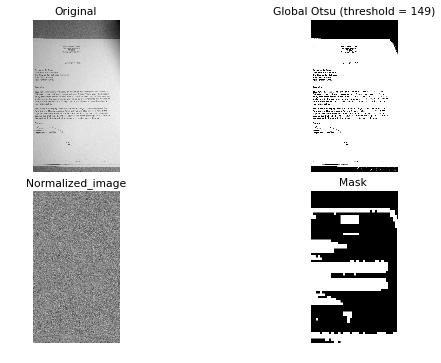

In [11]:
matplotlib.rcParams['font.size'] = 9
img = x.astype(np.uint8)
img = img_as_ubyte(img)

threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu
mask = np.ones_like(img, dtype = np.bool_)
rows, cols = img.shape
for i in range(0, rows, 48):
    for j in range(0, cols, 48):
        patch = global_otsu[i:i+48, j:j+48]
        summ = np.sum(patch)
        if summ == 0 or summ == 48*48:
            mask [i:i+48, j:j+48] = 0



fig, ax = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})
ax0, ax1, ax2, ax3 = ax.ravel()
plt.tight_layout()

ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title('Original')
ax0.axis('off')

ax1.imshow(global_otsu, cmap=plt.cm.gray)
ax1.set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax1.axis('off')

ax2.imshow(blurr_image, cmap=plt.cm.gray)
ax2.set_title('Normalized_image')
ax2.axis('off')

ax3.imshow(mask, cmap=plt.cm.gray)
ax3.set_title('Mask')
ax3.axis('off')

plt.show()

In [59]:
cd /media/perceptron/54B4F78779120A69/text-data/Document/images

/media/perceptron/54B4F78779120A69/text-data/Document/images


In [9]:
import h5py
import numpy as np
with h5py.File('document.hdf5', 'r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('Y')
    Y = np.array(data)
    print('Shape of the array dataset_1: \n', Y.shape)
    

List of arrays in this file: 
 KeysView(<HDF5 file "document.hdf5" (mode r)>)
Shape of the array dataset_1: 
 (96250,)


In [11]:
Y[0:96000:275]

array([ 95.37,  95.37,  97.12,  97.12,  98.97,  98.97,  98.15,  98.15,
        97.22,  97.22,  12.86,  12.86,  97.84,  97.84,  88.61,  88.61,
        86.95,  86.95,  24.12,  24.12,  16.25,  16.25,  97.38,  97.38,
        63.92,  63.92,  90.98,  90.98,   9.34,   9.34,  70.86,  70.86,
        71.99,  71.99,  90.41,  90.41,  90.04,  90.04,  32.14,  32.14,
        64.29,  64.29,  93.73,  93.73,  51.  ,  51.  ,  93.87,  93.87,
        77.92,  77.92,  83.9 ,  83.9 ,  95.3 ,  95.3 ,  77.06,  77.06,
        96.29,  96.29,  76.92,  76.92,  91.25,  91.25,  80.64,  80.64,
        88.2 ,  88.2 ,  93.6 ,  93.6 ,  93.92,  93.92,  81.83,  81.83,
        18.09,  18.09,  95.73,  95.73,  94.63,  94.63,  16.82,  16.82,
        83.81,  83.81,  90.96,  90.96,  91.61,  91.61,  91.39,  91.39,
        84.9 ,  84.9 ,  90.59,  90.59,  54.92,  54.92,  94.4 ,  94.4 ,
        18.43,  18.43,  15.82,  15.82,  95.64,  95.64,  18.43,  18.43,
        95.52,  95.52,  83.52,  83.52,  95.45,  95.45,  94.74,  94.74,
      